<a href="https://colab.research.google.com/github/thomsonnapitupulu/ai-ml-exercises/blob/main/House_pricing_June.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1:  Import all libraries

In [ ]:
!pip install numpy pandas tensorflow
!pip install matplotlib
import matplotlib.pyplot as plt


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset

data=pd.read_csv('house_price.csv')

#Show the several row of the house price

print(data.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [ ]:
# Separate target variables and and the features

X = data.drop('price', axis=1)
y = data['price']

# Identify categorical columns
categorical_cols=X.select_dtypes(include=['object','category']).columns.to_list()

# Convert categorical into numerical

preprocessor=ColumnTransformer(
    transformers=[
        ('num', StandardScaler(),  ~X.columns.isin(categorical_cols)),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)]


)

# create pipeline

pipe=Pipeline([
    ('preprocessor', preprocessor),])

#Apply the pipeline into the data

X_processed=pipe.fit_transform(X)

#Split the data

X_train, X_test, y_train, y_test=train_test_split(X_processed,y,test_size=0.2,random_state=0)





In [ ]:
print ('X',X)
print('after one hot encoding', X_train)

X      area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1        1       no        no       no   
544  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  

Input|Layer 1-Relu|Output Layer Relu

In [ ]:
model=Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # output layer- Regression

])

# compile

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history=model.fit(X_train, y_train,  validation_data=(X_test,y_test),epochs=80, batch_size=12)
model.summary()


Epoch 1/80
37/37 [==============================] - 3s 8ms/step - loss: 26469958942720.0000 - mae: 4777633.0000 - val_loss: 25189209341952.0000 - val_mae: 4723101.5000
Epoch 2/80
37/37 [==============================] - 0s 4ms/step - loss: 26469914902528.0000 - mae: 4777629.0000 - val_loss: 25189123358720.0000 - val_mae: 4723093.0000
Epoch 3/80
37/37 [==============================] - 0s 4ms/step - loss: 26469768101888.0000 - mae: 4777615.5000 - val_loss: 25188909449216.0000 - val_mae: 4723072.5000
Epoch 4/80
37/37 [==============================] - 0s 4ms/step - loss: 26469434654720.0000 - mae: 4777583.0000 - val_loss: 25188437590016.0000 - val_mae: 4723027.5000
Epoch 5/80
37/37 [==============================] - 0s 4ms/step - loss: 26468753080320.0000 - mae: 4777519.5000 - val_loss: 25187575660544.0000 - val_mae: 4722944.5000
Epoch 6/80
37/37 [==============================] - 0s 4ms/step - loss: 26467597549568.0000 - mae: 4777413.5000 - val_loss: 25186176860160.0000 - val_mae: 47228

<function matplotlib.pyplot.show(close=None, block=None)>

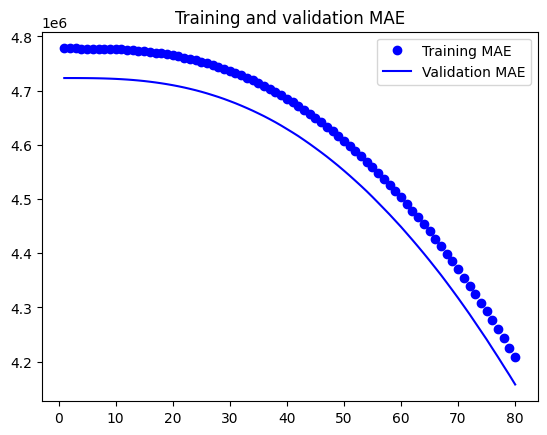

In [ ]:
# plot the MAE

mae_history =history.history['mae']

val_mae_history = history.history['val_mae']

epochs = range(1, len(mae_history) + 1)

plt.plot(epochs, mae_history, 'bo', label='Training MAE')

plt.plot(epochs, val_mae_history, 'b', label='Validation MAE')

plt.title('Training and validation MAE')

plt.legend()

plt.show